In [56]:
import pandas as pd
import os
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [32]:
os.getcwd()

'/Users/saiveerreddy/Desktop/Jupyter'

In [33]:
data = pd.read_csv("movie.csv")

In [34]:
data.head(10)

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
5,2012,Action,39,63,200,2009
6,27 Dresses,Comedy,40,71,30,2008
7,30 Days of Night,Horror,50,57,32,2007
8,30 Minutes or Less,Comedy,43,48,28,2011
9,50/50,Comedy,93,93,8,2011


In [35]:
data.columns = ["Film", "Genre", "CriticRating", "AudienceRating","BudgetInMil","Year"]

In [38]:
#converting required features as categorical variables
data.Film = data.Film.astype("category")
data.Year= data.Year.astype("category") 
data.Genre= data.Genre.astype("category") 

In [39]:
data.Year.cat.categories # to view the different levels in a categorical variable
data.columns

Index(['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetInMil',
       'Year'],
      dtype='object')

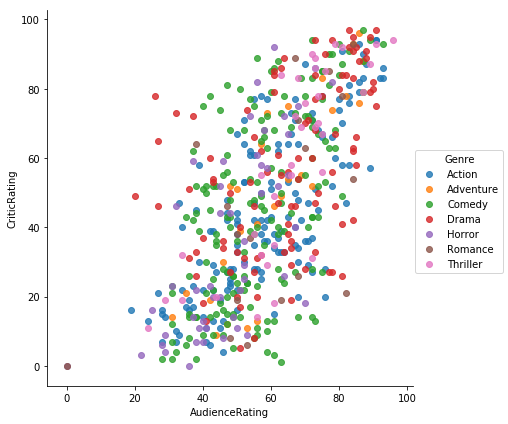

In [94]:
# Critic Ratings vs Audience ratings for movies based on Genre
j = sns.lmplot(data= data, x= 'AudienceRating', y = 'CriticRating', fit_reg= False, hue = 'Genre', size = 6)


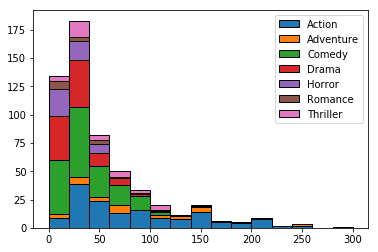

In [126]:
#To view movie budget of movies based on genre
l2 = list()
l3 = list()
for g in data.Genre.cat.categories:
    l2.append(data[data.Genre== g].BudgetInMil)
    l3.append(g)

p = plt.hist(l2, bins = 15, stacked=True, edgecolor='black',label=l3)
plt.legend()
plt.show()



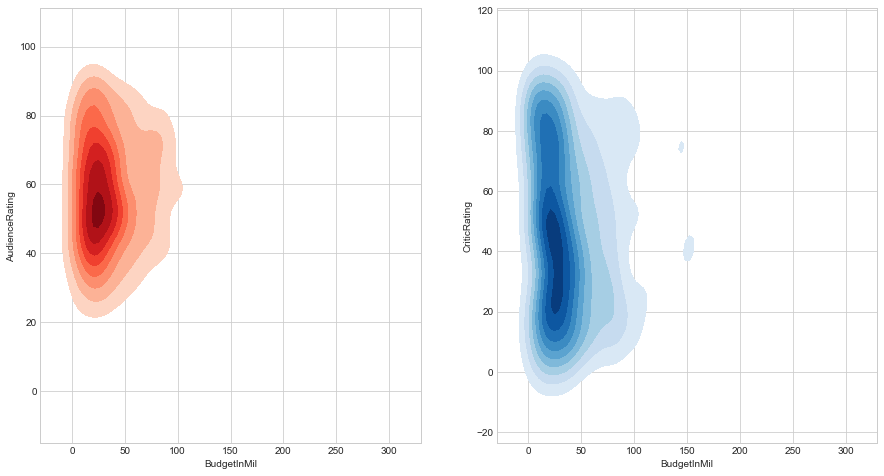

In [158]:
f , ax = plt.subplots(1,2, figsize=(15,8))
sns.set_style('whitegrid')
k1 = sns.kdeplot(data.BudgetInMil,data.AudienceRating, shade=True,shade_lowest=False, cmap='Reds', ax = ax[0])
k2 = sns.kdeplot( data.BudgetInMil,data.CriticRating, shade=True,shade_lowest=False, cmap='Blues', ax = ax[1])

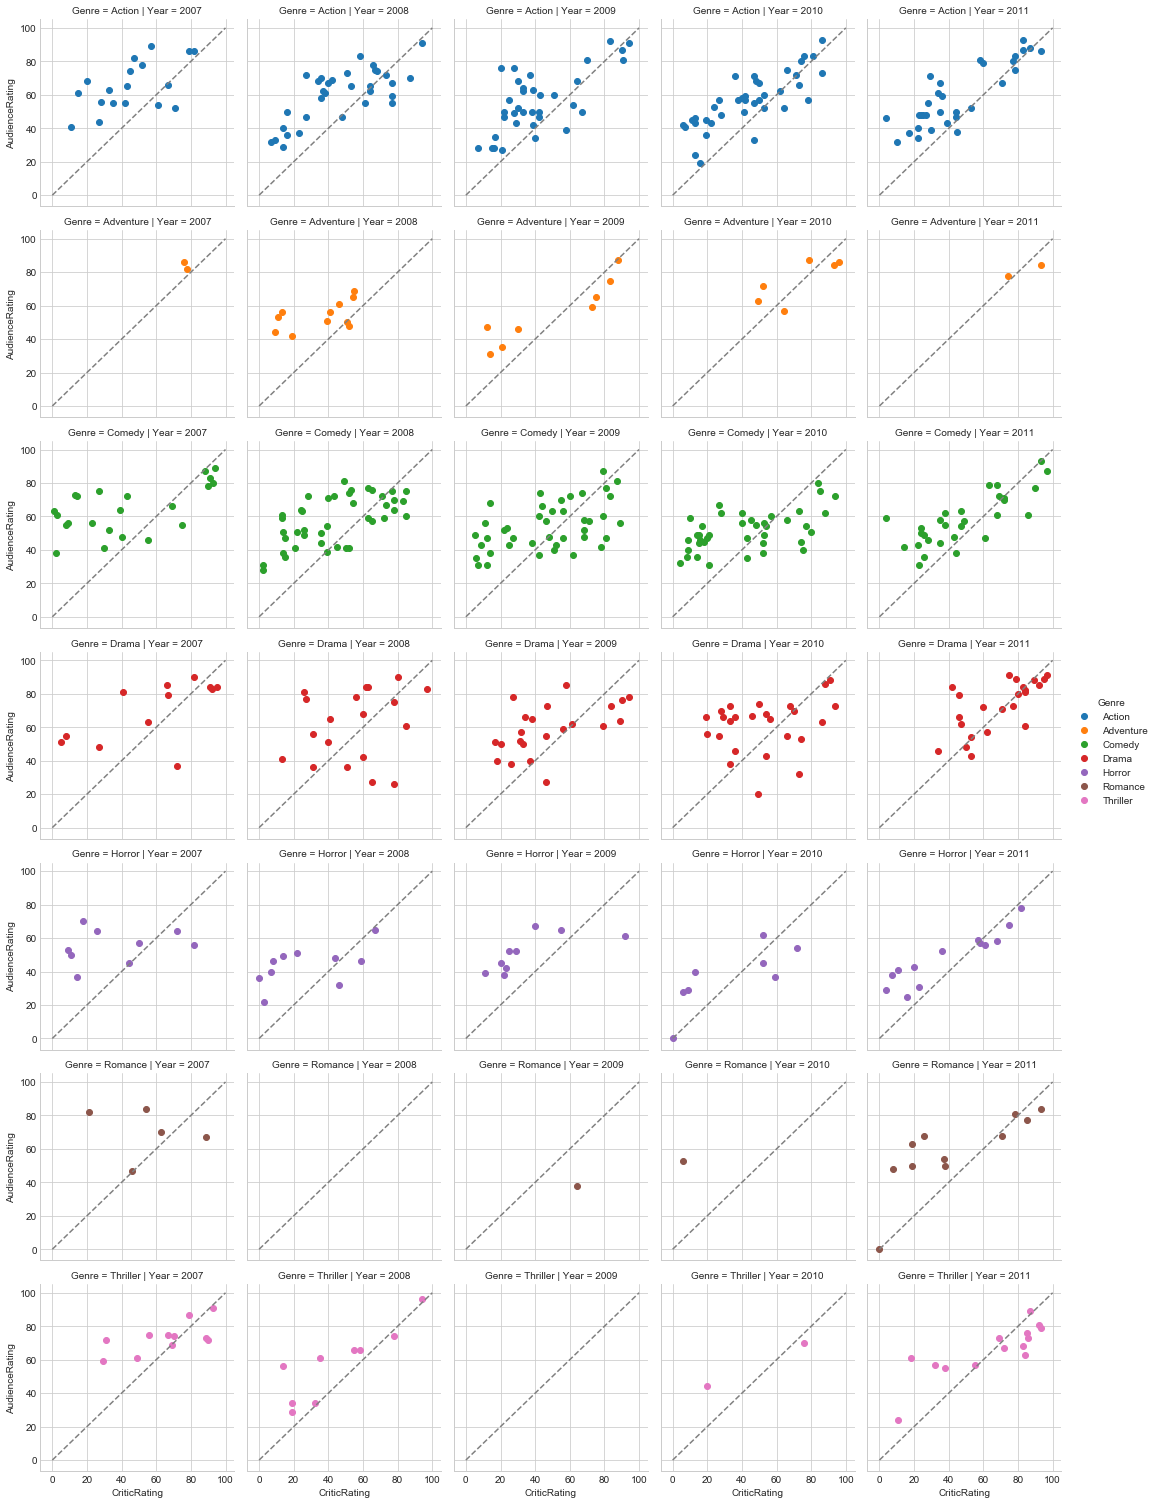

In [170]:
#Creating facets
w = sns.FacetGrid(data, col='Year', row='Genre',hue='Genre')
w = w.map(plt.scatter,'CriticRating','AudienceRating' )
for ax in w.axes.flat:
    ax.plot((0,100),(0,100), c= 'grey', ls='--')
w.add_legend()